<a href="https://colab.research.google.com/github/RaviChandraVeeramachaneni/fastbook_myexperiments/blob/main/chap_1_exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check which GPU is allocated to you by google colab

In [20]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jun 28 20:59:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    34W / 250W |   4249MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Check how much RAM is allocated by the google colab

In [21]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## Install the fastbook

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 4.2MB/s 
     |████████████████████████████████| 1.2MB 8.5MB/s 
     |████████████████████████████████| 194kB 18.5MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 


## Setting up the fastbook

In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


## Import everything from fastbook for learning


In [ ]:
from fastbook import *

## Import all the needed Vision realted library from fastAI

In [ ]:
from fastai.vision.all import *

## Download, extract the PETS data

In [32]:
path = untar_data(URLs.PETS)/'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

#### A boolean function needed to return YES/No whether the starting letter of the name of the Image starts with Uppercase or lowercase

In [8]:
def is_cat(x):
    return x[0].isupper()

### Creating a DataLoader object while passing
    - path: dataset Path class Object which is a link to the   dowladed data set
    - get_image_files(path): gets the images from that path
    - valid_pct(<num>): The percentage of data to be divided to the validation set from the original dataset.
    - seed: A random number to divide the dataset exactly the same everytime we run the training
    - label_func: Takes a function external/inline to classify the image based on the Starting letter of the Image Name
    - item_tfms: Takes and Resize object to resize all images to same size

In [34]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
dls

## Creating a Learner Object which is a Convolutional Network and holds which cnn algorithm to use for the training
### Learner Object:
    - dls: dataloader object
    - arch: Algorithm used for training
    - metrics: whihc metrics to used for training for us to understand.
### fine_tune(<num_of_epochs>): Number of times to go through the whole image data set once.

Note: A Epoch is one cycle when the training has been done on all images.

In [28]:
learn = cnn_learner(dls, arch=resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.137895,0.017491,0.005413,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.039172,0.012185,0.006089,00:31
1,0.040219,0.040615,0.010825,00:31
2,0.033585,0.030381,0.006766,00:31
3,0.025333,0.045053,0.014208,00:31
4,0.022407,0.014818,0.004736,00:31
5,0.018075,0.013688,0.005413,00:31
6,0.011473,0.008942,0.002030,00:31
7,0.005589,0.011308,0.002030,00:31
8,0.002431,0.008008,0.002706,00:31
9,0.002753,0.008438,0.002706,00:31


## Testing Phase
### Create a Widget uploader to uplaod an image of dog/cat.

In [36]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

## Create an Image object out of the uploaded Image

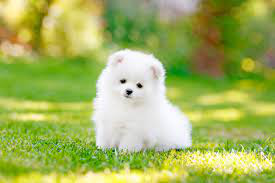

In [55]:
img = PILImage.create(uploader.data[0])
img

## Predicting a Dog/Cat

In [57]:
?learn.predict

In [54]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"The Probability that it's a cat: {probs[1].item():.6f}")
print(f"The Probability that it's not a cat: { 1 - probs[1].item():.6f}")

Is this a cat?: False.
The Probability that it's a cat: 0.000013
The Probability that it's not a cat: 0.999987
